# Alpha lifetime

An script to compute alpha lifetime.

In [1]:
from __future__ import print_function, division
%load_ext autoreload
%autoreload 2
import sys
import os
import operator
import functools
import textwrap
import copy
import time
from glob import glob
import math
print("Running on ", time.asctime())

import textwrap
import numpy as np
import pandas as pd
import tables as tb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from invisible_cities.database import load_db
from invisible_cities.core.system_of_units_c import units
#import invisible_cities.core.system_of_units_c as units
from invisible_cities.core.core_functions import timefunc, flat
import invisible_cities.core.fit_functions as fitf
import invisible_cities.core.mpl_functions as mpl
from invisible_cities.core.mpl_functions import plot_pmt_waveforms, plot_pmt_signals_vs_time_mus, \
              plot_signal_vs_time_mus
from invisible_cities.core.core_functions import in_range

import invisible_cities.reco.tbl_functions as tbl
from invisible_cities.reco.pmaps_functions import plot_s12, width, integrate_charge
import invisible_cities.reco.pmaps_functions as pmapf
from invisible_cities.reco.params import S12Params, ThresholdParams


sys.path.append('/Users/alej/Desktop/Valencia/nextic/ICARO')

from icaro.core.event_pmaps import EventPmaps, print_s12, print_s2si
from icaro.core.hst_functions import labels, hist, doublehist, hist2d, pdf, scatter, profile_and_scatter,\
                              doublescatter, covariance, reso, gausstext, plot_profile_histogram 
from icaro.core.kdst_functions import load_dst, event_rate, profile_and_fit, print_fit, chi2


from scipy.optimize import curve_fit
from icaro.core.kdst_functions import load_dst, event_rate, profile_and_fit, \
                               profile_and_fit_radial, print_fit, MapXY, chi2,\
                               time_from_timestamp, lifetime

pi = np.pi



Running on  Tue May 23 17:26:38 2017


In [2]:
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

2017-05-23 17:26:39


In [3]:
def plot_options(figsize=(6,6), fontsize=15):
    plt.rcParams["figure.figsize"]          = figsize
    plt.rcParams["font.size"]               = fontsize
    plt.rcParams["figure.max_open_warning"] = 100

In [4]:
plt.rcParams["figure.figsize"]          = 6, 6
plt.rcParams["font.size"]               = 15
plt.rcParams["figure.max_open_warning"] = 100

profOpt = "--k"
fitOpt  = "r"

### Run Parameters

In [5]:
runs = [3628,
        3645,
        3715,
        3724,
        3733,
        3741,
        3753,
        3756,
        3758,
        3762,
        3767,
        3769,
        3772,
        3774,
        3782,
        3784,
        3788,
        3790,
        3793,
        3795,
        3822,
        3824,
        3826,
        3829,
        3883,
        3888,
        3897,
        3900,
        3903,
        3905,
        3998]

runs = [3905, 3988, 3998, 4002, 4021, 4027, 4029, 4035, 4050, 5051]
#runs = [3988, 3998, 4002, 4021, 4027, 4029, 4035, 4050, 4051]

using data set with length 416
t0 = 2017-05-08 10:07:45 (index = 0) t1 = 2017-05-08 11:10:10 (index = 416)
bin length = 138
 ---fit over events between 0 and 137
time0 = 2017-05-08 10:07:45 time1 = 2017-05-08 10:29:56
size of time leg = 137
fit par[0] = 79149.79262814483 error = 3571.282337786722
fit par[1] = -644.8170518291648 error = 78.75853355880508
degrees of freedom = 2
chi2 = 3.04606768817446
 ---fit over events between 138 and 275
time0 = 2017-05-08 10:30:06 time1 = 2017-05-08 10:51:10
size of time leg = 137
fit par[0] = 70316.38254928011 error = 450.7295754634197
fit par[1] = -686.4414134822603 error = 11.073013997830538
degrees of freedom = 2
chi2 = 0.3992397181299213
 ---fit over events between 276 and 413
time0 = 2017-05-08 10:51:52 time1 = 2017-05-08 11:10:03
size of time leg = 137
fit par[0] = 72447.39477700392 error = 1057.494847656558
fit par[1] = -584.3659145188965 error = 22.599303739600792
degrees of freedom = 2
chi2 = 1.0016074579334306
using data set with length 23

/Users/alej/Desktop/Valencia/nextic/IC-1/invisible_cities/core/fit_functions.py:108: RuntimeWarning: divide by zero encountered in double_scalars
  chi2 / (len(x) - 1 - len(vals)),


using data set with length 1891
t0 = 2017-05-18 08:59:31 (index = 0) t1 = 2017-05-18 09:32:13 (index = 1891)
bin length = 630
 ---fit over events between 0 and 629
time0 = 2017-05-18 08:59:31 time1 = 2017-05-18 09:08:24
size of time leg = 629
fit par[0] = 59621.866356774146 error = 219.29336523283948
fit par[1] = -409.6304950372064 error = 2.7465215271607826
degrees of freedom = 2
chi2 = 0.3531854017944459
 ---fit over events between 630 and 1259
time0 = 2017-05-18 09:08:25 time1 = 2017-05-18 09:24:46
size of time leg = 629
fit par[0] = 61231.97679467465 error = 161.1109110694481
fit par[1] = -406.2345585190672 error = 1.762436639854714
degrees of freedom = 2
chi2 = 0.26910382329961163
 ---fit over events between 1260 and 1889
time0 = 2017-05-18 09:24:47 time1 = 2017-05-18 09:32:12
size of time leg = 629
fit par[0] = 62571.85918575392 error = 1367.5089339134922
fit par[1] = -392.8370984167649 error = 14.396983673311025
degrees of freedom = 2
chi2 = 2.5251414006534962
using data set wit

OSError: ``/Users/alej/Desktop/IC_DATA/LSC/kdst/dst_5051.root.h5`` does not exist

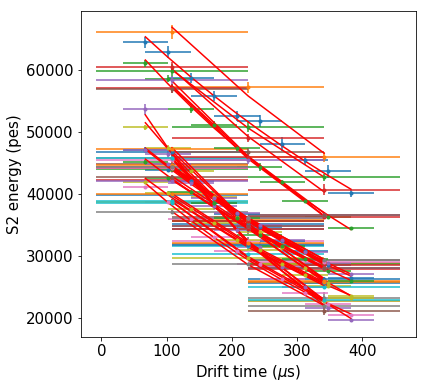

In [7]:
LT  = {}
times = []
times_all = []
lifetimes_all = []
elambdas_all = []
lifetimes = []


errors = []
for i, run_number in enumerate(runs):
    
    DataPMT = load_db.DataPMT(run_number)
    DataSiPM = load_db.DataSiPM(run_number)
    xs = DataSiPM.X.values
    ys = DataSiPM.Y.values
    
    ifile = os.path.join(os.environ['IC_DATA'], 'LSC/kdst/dst_{}.root.h5'.format(run_number)) 
    full = load_dst(ifile)
    r = event_rate(full)
    st = datetime.datetime.fromtimestamp(full.time[-1:]).strftime('%Y-%m-%d %H:%M:%S')
    core = full[full.R < 100]     # Cuts
    zrange =   50, 400            # Cuts
    Erange = 1e+3, 70e3
    nbins = 10
    F, x, y, sy = profile_and_fit(core.Z, core.S2e, 
                    xrange=zrange, 
                    yrange=Erange, 
                    nbins=nbins, 
                    fitpar=(50000,-300), label=("Drift time ($\mu$s)", "S2 energy (pes)"))
    lifetimes.append(-F.values[1])
    errors.    append(F.errors[1])
    
    # This part is a little lazy. But, more or less, TIME[0] refers to start of run, TIME[-1] refers to
    # end of the run, TIME[1] refers to middle of run (since nbins=3)
    CHI2, LAMBDA, ELAMBDA, TSTAMP, TIME = lifetime(dst=core, zrange=(50,400), Erange=(1e+3, 80e3), nbins=3)    
    times.append(TIME[1])
times = np.array(times)
lifetimes = np.array(lifetimes)
errors = np.array(errors)


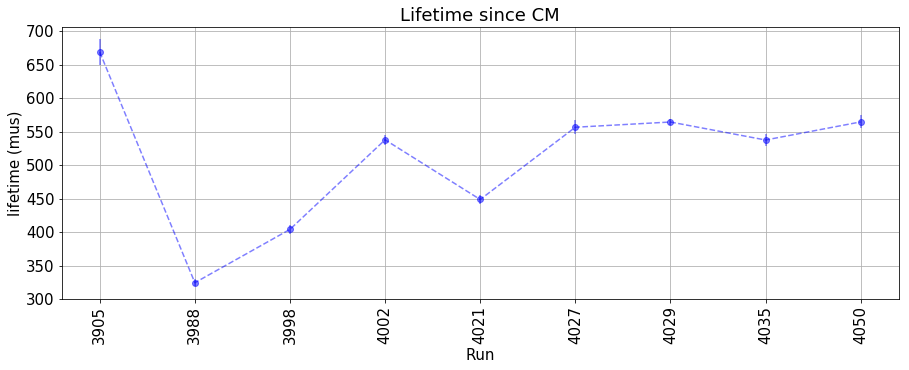

In [9]:
plt.figure(figsize=(15,5))
#plt.plot(times, lifetimes)
plt.errorbar(range(len(lifetimes)), lifetimes, yerr=errors, linestyle='--', fmt='o', c='blue', alpha=.5)
plt.xticks(range(len(lifetimes)), runs, rotation='vertical')
plt.grid(True)
plt.title('Lifetime since CM')
plt.xlabel('Run')
plt.ylabel('lifetime (mus)')
plt.show()



In [10]:
list(zip(runs, times, lifetimes))

[(3905, datetime.datetime(2017, 5, 8, 10, 51, 10), 668.87935959250581),
 (3988, datetime.datetime(2017, 5, 16, 16, 20, 6), 324.59538338562027),
 (3998, datetime.datetime(2017, 5, 18, 9, 24, 46), 404.24495666252454),
 (4002, datetime.datetime(2017, 5, 18, 11, 52, 50), 537.97792931079141),
 (4021, datetime.datetime(2017, 5, 18, 20, 44, 38), 448.83467263907556),
 (4027, datetime.datetime(2017, 5, 19, 11, 2, 5), 556.71275204870278),
 (4029, datetime.datetime(2017, 5, 19, 21, 50, 49), 564.52377740093323),
 (4035, datetime.datetime(2017, 5, 20, 12, 54, 28), 537.6680686186894),
 (4050, datetime.datetime(2017, 5, 21, 0, 25, 11), 564.66179776067008)]

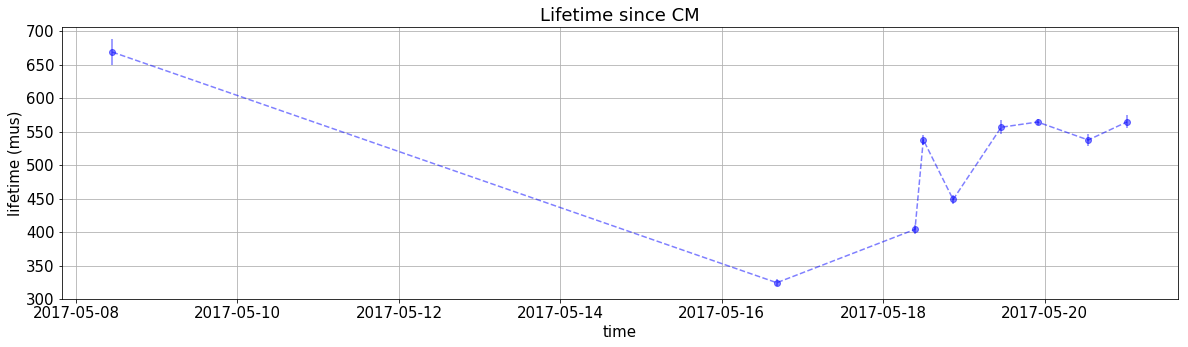

In [11]:
plt.figure(figsize=(20,5))
#plt.plot(times, lifetimes)
plt.errorbar(times, lifetimes, yerr=errors, linestyle='--', fmt='o', c='blue', alpha=.5)
plt.grid(True)
plt.title('Lifetime since CM')
plt.xlabel('time')
plt.ylabel('lifetime (mus)')
plt.show()


In [ ]:
times